# Задание. По таблице ниже найти 'подушку безопасности' в виде 95% перцентили от финансов методом Монте-Карло, при котором вероятность дефолта достаточно мала

In [3]:
#импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm

In [4]:
# ввод данных
EAD = np.array([1000,2000,2500])
PD_mean = np.array([0.02, 0.01, 0.015])
PD_sigma = np.array([0.007, 0.005, 0.01])
LGD_mean = np.array([0,0,0])
LGD_mode = np.array([0.2,0.3,0.4])
LGD_max = np.array([1,1,1])

In [5]:
# расчет вероятности дефолта с помощью логонормального распределения
n = 50000
PD = np.array([
    np.log(np.random.lognormal(PD_mean[0], PD_sigma[0], n)),
    np.log(np.random.lognormal(PD_mean[1], PD_sigma[1], n)),
    np.log(np.random.lognormal(PD_mean[2], PD_sigma[2], n))])

In [6]:
#бета-pert распределение (функция)
def pert(a, b, c, *, size=1, lamb=4):
    r = c - a
    alpha = 1 + lamb * (b - a) / r
    beta = 1 + lamb * (c - b) / r
    return a + np.random.beta(alpha, beta, size=size) * r

In [7]:
# применения функции к убытку при дефолте для каждого кредита
LGD0 = pert(LGD_mean[0], LGD_mode[0], LGD_max[0], size=n)
LGD1 = pert(LGD_mean[1], LGD_mode[1], LGD_max[1], size=n)
LGD2 = pert(LGD_mean[2], LGD_mode[2], LGD_max[2], size=n)

In [8]:
# расчет ожидаемых потерь для каждого кредита
El1 = PD[0]*LGD0*EAD[0]
El2 = PD[1]*LGD1*EAD[1]
El3 = PD[2]*LGD2*EAD[2]
El = El1 + El2 + El3

"Подушка безопасности" =  57.813867269553704


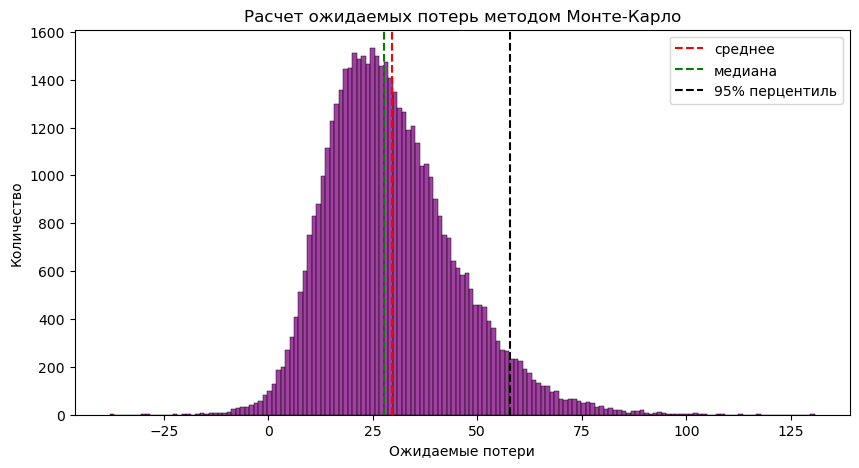

In [9]:
# построение графика
fig = plt.figure(figsize = (10,5))
ax = plt.subplot()
sns.histplot(El, edgecolor = 'black', color = 'purple')
# среднее, медиана и 95% перцентиль
ax.axvline(np.mean(El), color = 'red', linestyle = '--', label = 'среднее')
ax.axvline(np.median(El), color = 'green', linestyle = '--', label = 'медиана')
ax.axvline(np.percentile(El, 95), color = 'black', linestyle = '--', label = '95% перцентиль')
# оформление графика
ax.set_xlabel("Ожидаемые потери")
ax.set_ylabel("Количество")
ax.legend()
ax.set_title("Расчет ожидаемых потерь методом Монте-Карло")
print('"Подушка безопасности" = ',np.percentile(El,95))